In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
# Load data
df = pd.read_csv('macro_monthly.csv')
print("\nData Info:")
df.info()


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Year                                     384 non-null    int64  
 1   Month                                    384 non-null    int64  
 2   Industrial_Production                    384 non-null    float64
 3   Manufacturers_New_Orders: Durable Goods  384 non-null    float64
 4   Consumer_Price Index                     384 non-null    float64
 5   Unemployment_Rate                        384 non-null    float64
 6   Retail_Sales                             384 non-null    float64
 7   Producer_Price_Index                     384 non-null    float64
 8   Personal_Consumption_Expenditures        384 non-null    float64
 9   National_Home_Price_Index                384 non-null    float64
 10  All_Employees(Total_Nonfarm)          

In [3]:
# Create datetime index 
df['Date'] = pd.to_datetime({'year': df['Year'], 'month': df['Month'], 'day': 1})
df.set_index('Date', inplace=True)

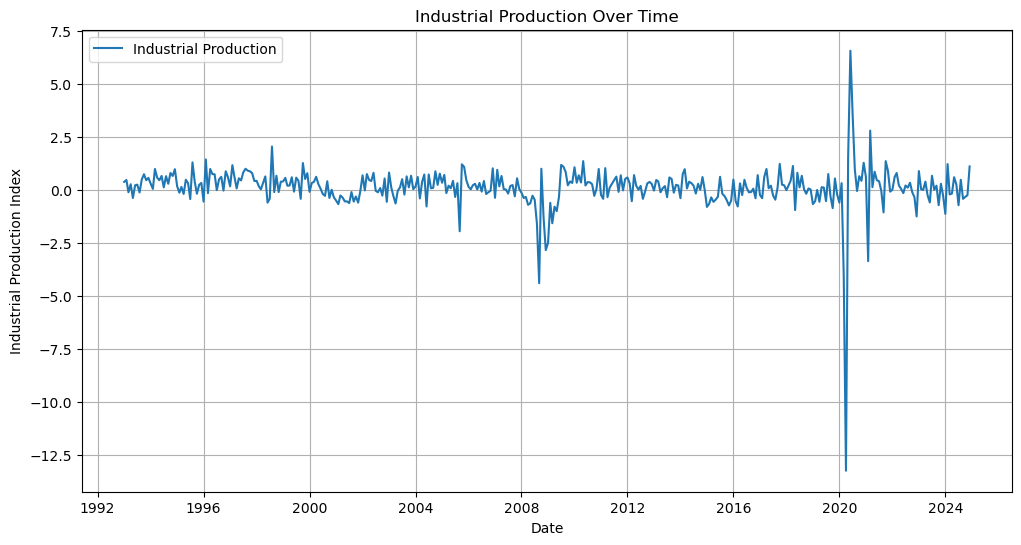

In [4]:
# Plot industrial production
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Industrial_Production'], label='Industrial Production')
plt.title('Industrial Production Over Time')
plt.xlabel('Date')
plt.ylabel('Industrial Production Index')
plt.grid(True)
plt.legend()
plt.show()

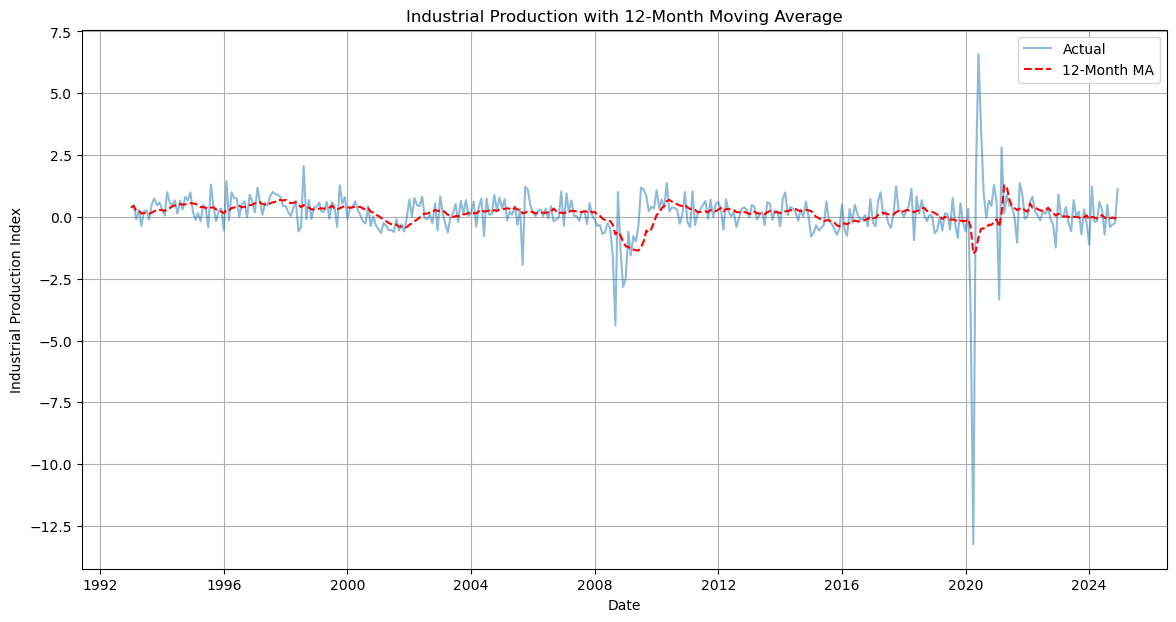

In [5]:
# Moving averages calculation and plot
df['MA_12'] = df['Industrial_Production'].rolling(window=12, min_periods=1).mean()  # Added min_periods
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Industrial_Production'], label='Actual', alpha=0.5)
plt.plot(df.index, df['MA_12'], label='12-Month MA', linestyle='--', color='red')
plt.title('Industrial Production with 12-Month Moving Average')
plt.xlabel('Date')
plt.ylabel('Industrial Production Index')
plt.legend()
plt.grid(True)
plt.show()

<Figure size 1200x800 with 0 Axes>

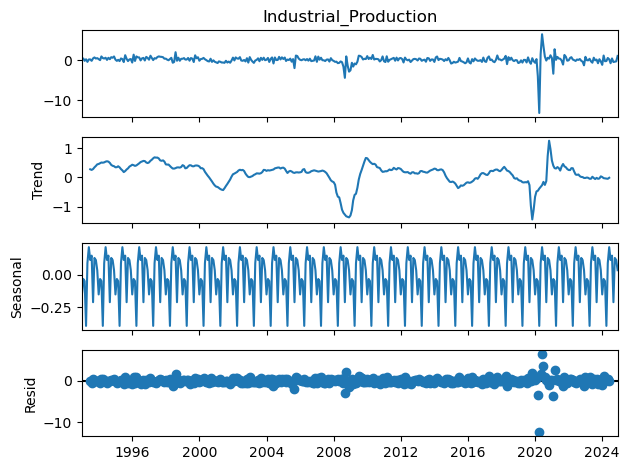

In [6]:
# Time series decomposition
try:
    result = seasonal_decompose(df['Industrial_Production'].dropna(), 
                              model='additive', 
                              period=12)
    plt.figure(figsize=(12, 8))
    result.plot()
    plt.tight_layout()
    plt.show()
except ValueError as e:
    print(f"Decomposition failed: {e}")

In [7]:
# Exponential Smoothing Forecast 
ts = df['Industrial_Production'].dropna()  

In [8]:
# Fit model with optimized parameters
model = ExponentialSmoothing(ts,
                           trend='add',
                           seasonal='add',
                           seasonal_periods=12,
                           initialization_method='estimated')
results = model.fit()

C:\Users\athar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [9]:
# Forecast next 12 months
forecast = results.forecast(steps=12)

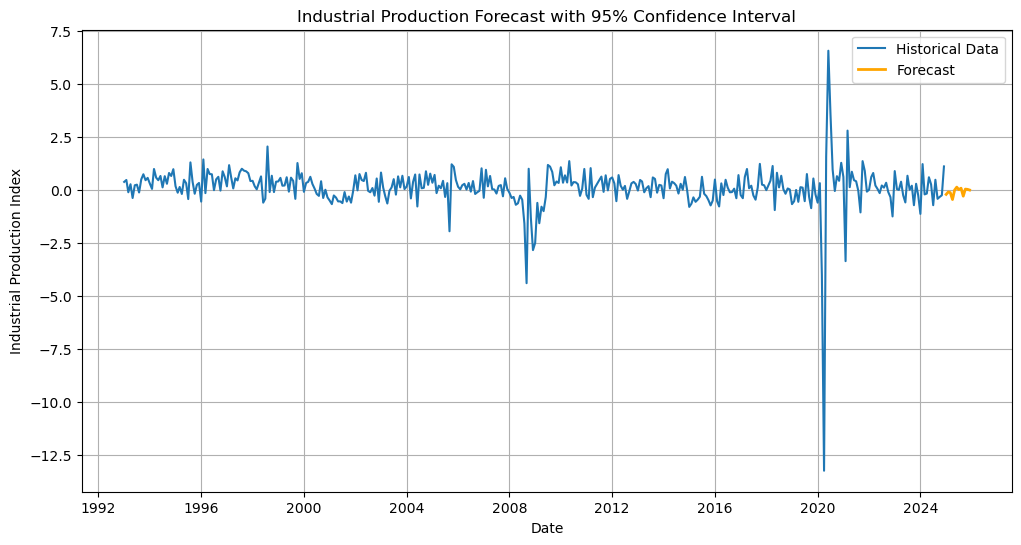

In [10]:
# Plot with improved formatting
plt.figure(figsize=(12,6))
plt.plot(ts.index, ts, label='Historical Data')
plt.plot(forecast.index, forecast, label='Forecast', color='orange', linewidth=2)
plt.fill_between(forecast.index, 
                 forecast * 0.95, 
                 forecast * 1.05,
                 color='orange', alpha=0.1)
plt.title('Industrial Production Forecast with 95% Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Industrial Production Index')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# Convert to readable DataFrame
forecast_df = pd.DataFrame({
    'Date': forecast.index.strftime('%b %Y'),  # Format as 'Jan 2023'
    'Forecast': forecast.values.round(2),  # Round to 2 decimals
    'Lower_CI': (forecast * 0.95).round(2),  # Example 95% CI
    'Upper_CI': (forecast * 1.05).round(2)
})

print(forecast_df)

                Date  Forecast  Lower_CI  Upper_CI
2025-01-01  Jan 2025     -0.20     -0.19     -0.21
2025-02-01  Feb 2025     -0.08     -0.08     -0.09
2025-03-01  Mar 2025     -0.12     -0.11     -0.12
2025-04-01  Apr 2025     -0.44     -0.42     -0.46
2025-05-01  May 2025      0.00      0.00      0.01
2025-06-01  Jun 2025      0.14      0.14      0.15
2025-07-01  Jul 2025      0.02      0.02      0.03
2025-08-01  Aug 2025      0.09      0.09      0.10
2025-09-01  Sep 2025     -0.28     -0.27     -0.30
2025-10-01  Oct 2025      0.05      0.05      0.05
2025-11-01  Nov 2025      0.04      0.04      0.04
2025-12-01  Dec 2025      0.01      0.01      0.01
